In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe =pd.read_csv( "C:\\Users\\Admin\\Downloads\\dineout_restaurants.csv")
print(dataframe)

                                Name  \
0                              Local   
1                      The G.T. ROAD   
2                            Tamasha   
3                  The Junkyard Cafe   
4     Chili's American Grill and Bar   
...                              ...   
6590                   Shree Rathnam   
6591                     Cafe Delish   
6592                     3 K Resorts   
6593                       Dovka Bar   
6594                     Urban Vibes   

                                               Location           Locality  \
0          Scindia House,Connaught Place, Central Delhi      Central Delhi   
1                M-Block,Connaught Place, Central Delhi      Central Delhi   
2                        Connaught Place, Central Delhi      Central Delhi   
3                        Connaught Place, Central Delhi      Central Delhi   
4                M-Block,Connaught Place, Central Delhi      Central Delhi   
...                                                

In [4]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
 
dataframe['Rating']=dataframe['Rating'].apply(handleRate)
print(dataframe.head())

                             Name  \
0                           Local   
1                   The G.T. ROAD   
2                         Tamasha   
3               The Junkyard Cafe   
4  Chili's American Grill and Bar   

                                       Location        Locality   City  \
0  Scindia House,Connaught Place, Central Delhi   Central Delhi  Delhi   
1        M-Block,Connaught Place, Central Delhi   Central Delhi  Delhi   
2                Connaught Place, Central Delhi   Central Delhi  Delhi   
3                Connaught Place, Central Delhi   Central Delhi  Delhi   
4        M-Block,Connaught Place, Central Delhi   Central Delhi  Delhi   

                                             Cuisine  Rating  Votes  Cost  
0           North Indian,  Finger Food,  Continental     4.1   2415  2000  
1                                       North Indian     4.3   2363  1500  
2  Finger Food,  North Indian,  Italian,  Contine...     4.2   5016  2000  
3  North Indian,  Mediterran

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6595 entries, 0 to 6594
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      6595 non-null   object 
 1   Location  6595 non-null   object 
 2   Locality  6595 non-null   object 
 3   City      6595 non-null   object 
 4   Cuisine   6595 non-null   object 
 5   Rating    6595 non-null   float64
 6   Votes     6595 non-null   int64  
 7   Cost      6595 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 412.3+ KB


Text(0.5, 0, 'Type of restaurant')

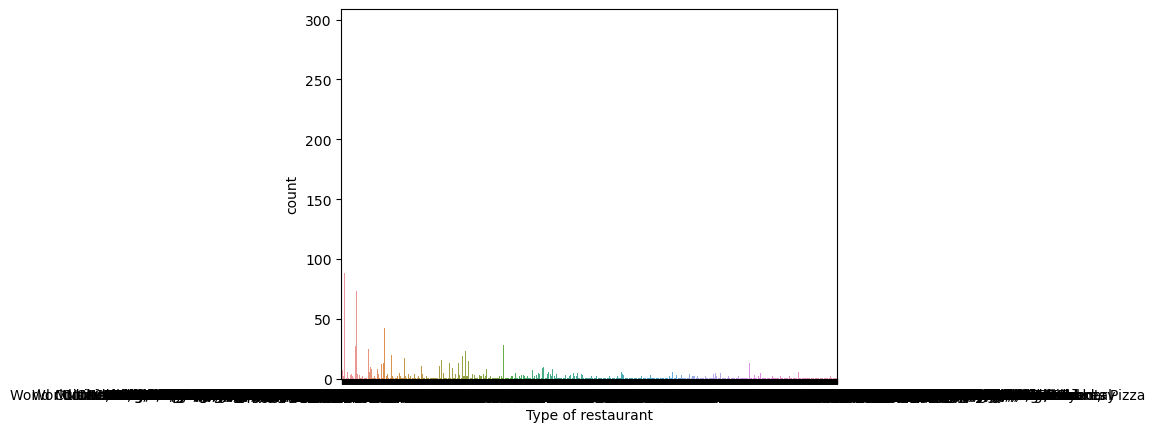

In [7]:
sns.countplot(x=dataframe['Cuisine'])
plt.xlabel("Type of restaurant")

Text(0, 0.5, 'Votes')

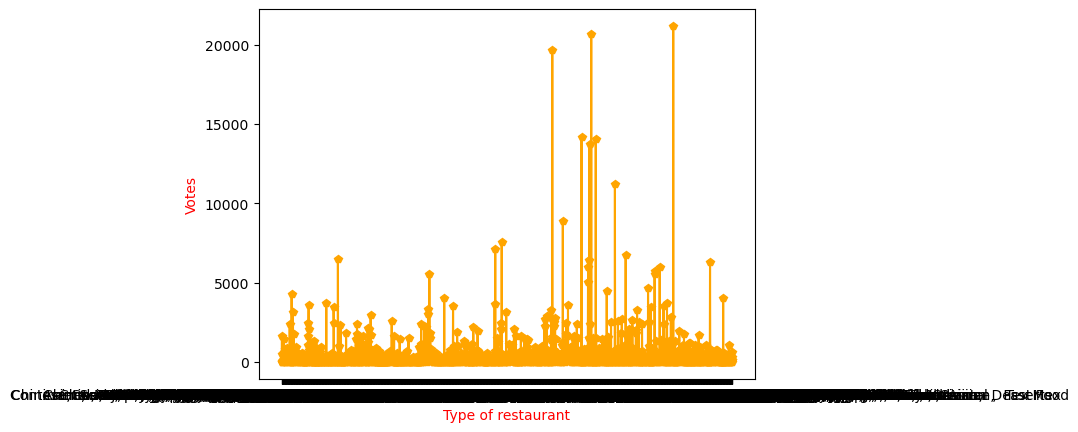

In [11]:
grouped_data = dataframe.groupby('Cuisine')['Votes'].sum()
result = pd.DataFrame({'Votes': grouped_data})
plt.plot(result, c="orange", marker="p")
plt.xlabel("Type of restaurant", c="red", size=10)
plt.ylabel("Votes", c="red", size=10)

In [13]:
max_votes = dataframe['Votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['Votes'] == max_votes, 'Name']
print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
2    Tamasha
Name: Name, dtype: object


<Axes: xlabel='City', ylabel='count'>

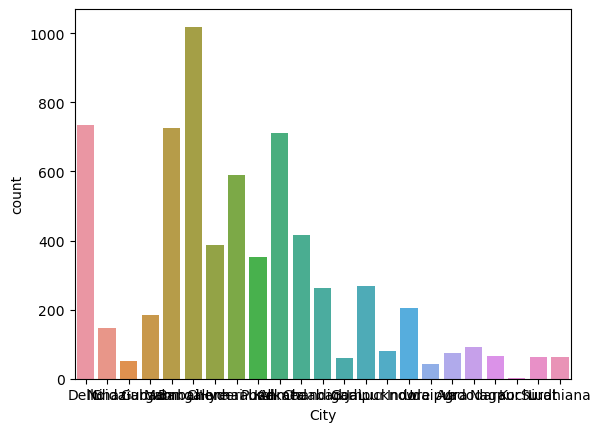

In [14]:
sns.countplot(x=dataframe['City'])

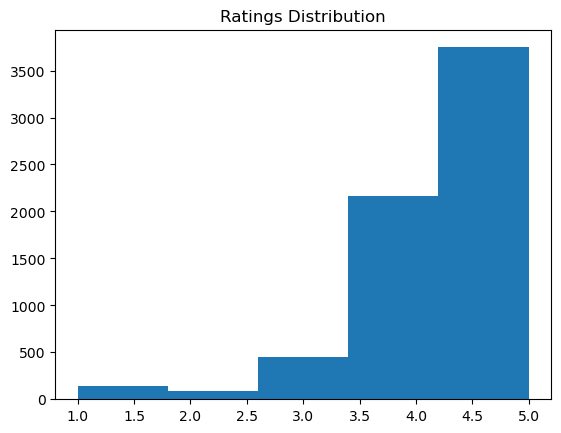

In [15]:
plt.hist(dataframe['Rating'],bins=5)
plt.title("Ratings Distribution")
plt.show()

<Axes: xlabel='Cost', ylabel='count'>

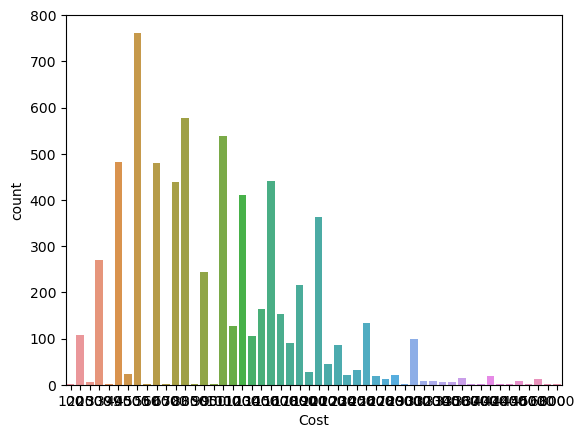

In [17]:
couple_data=dataframe['Cost']
sns.countplot(x=couple_data)

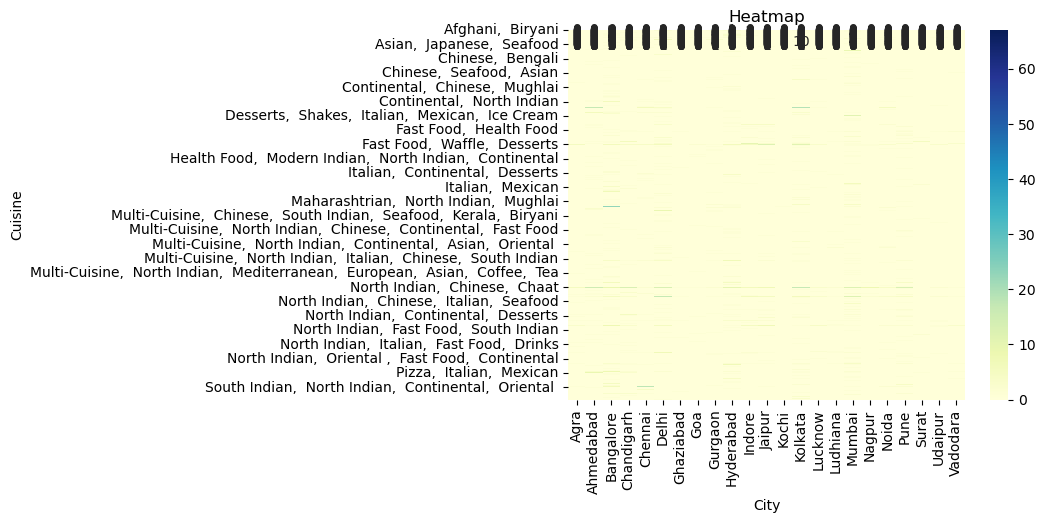

In [19]:
pivot_table = dataframe.pivot_table(index='Cuisine', columns='City', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("City")
plt.ylabel("Cuisine")
plt.show()